<a href="https://colab.research.google.com/github/Found-Bugs/Pengolahan-Citra-Visi-Komputer/blob/Week-5/Gamma_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


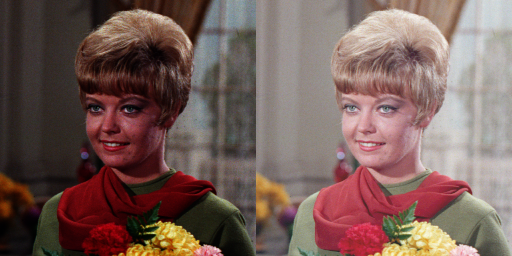

In [83]:
print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

gamma_correction_image = gamma_correction(original, gamma)

final_frame = cv.hconcat((original, gamma_correction_image))
cv2_imshow(final_frame)

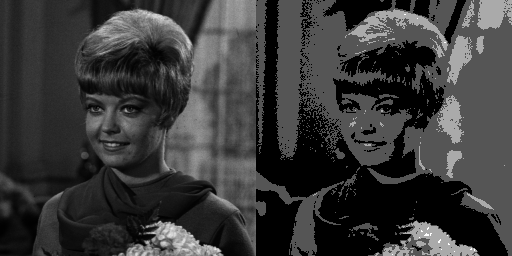

In [84]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Mengubah kedalaman bit gambar
depth_image = np.round(original / level) * level

# Konversi gambar ke dalam rentang 0-255 (jika tidak sudah dalam range tersebut)
depth_image = np.clip(depth_image, 0, 255)

final_frame = cv.hconcat([original, depth_image.astype(np.uint8)])
cv2_imshow(final_frame)

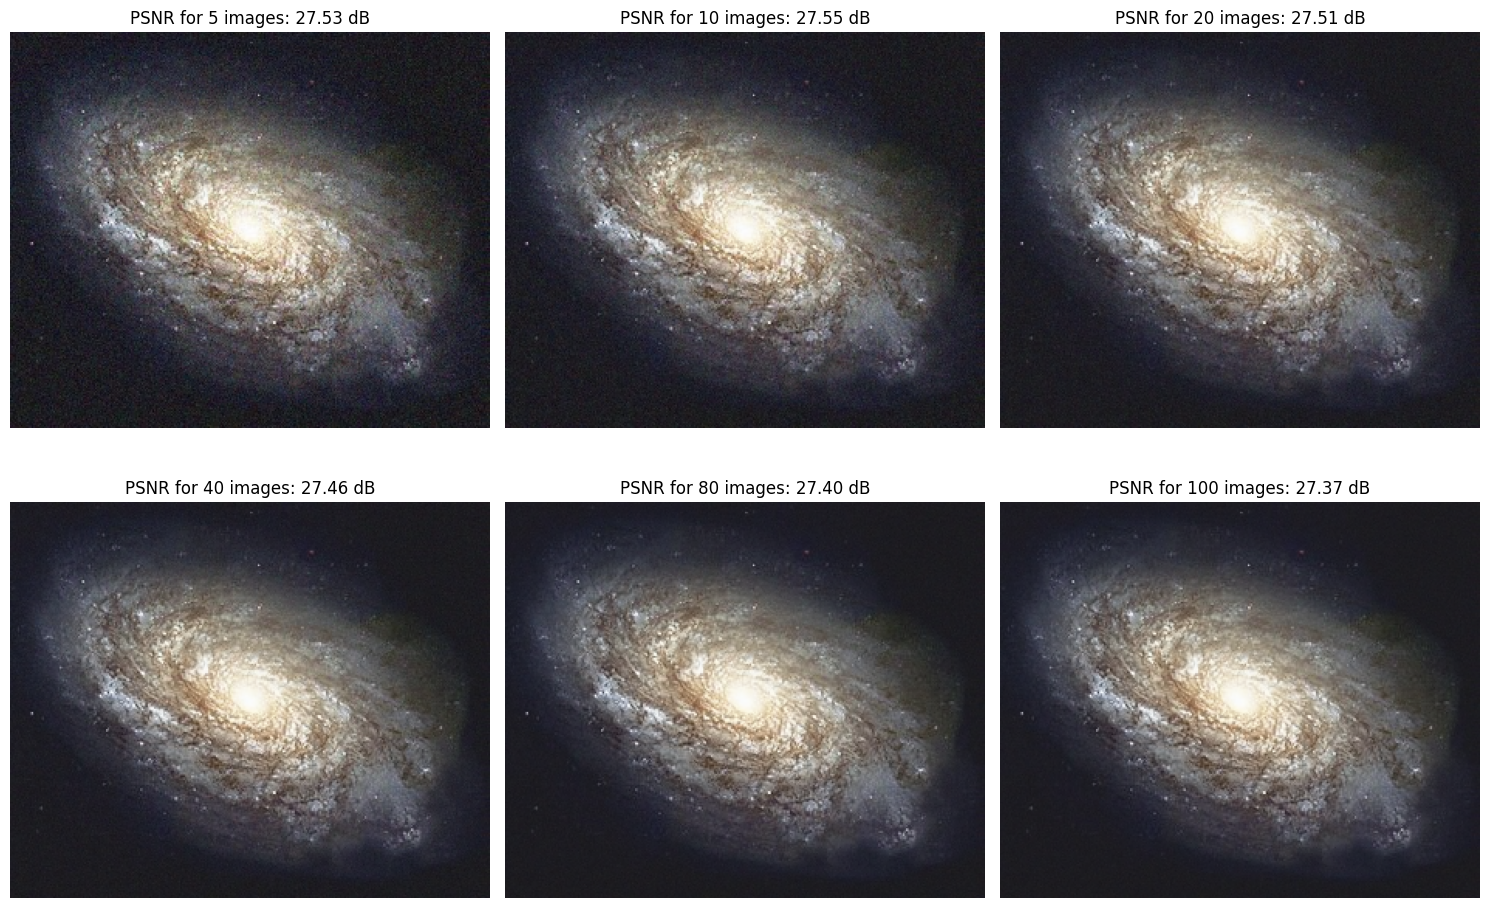

In [85]:
import glob
from math import log10, sqrt

# Fungsi untuk menghitung PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:  # Jika tidak ada perbedaan
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Fungsi untuk average denoising
def average_denoising(cv_img, num_images):
    # Membatasi jumlah gambar
    images = cv_img[:num_images]

    # Mendapatkan dimensi gambar
    h, w, c = images[0].shape

    # Inisialisasi array kosong untuk menyimpan hasil penjumlahan pixel
    average_img = np.zeros((h, w, c), np.float32)

    # Menambahkan semua gambar ke dalam array average_img
    for img in images:
        average_img += img.astype(np.float32)

    # Membagi total nilai pixel dengan jumlah gambar untuk mendapatkan rata-rata
    average_img /= len(images)

    # Konversi gambar kembali ke tipe uint8
    return np.clip(average_img, 0, 255).astype(np.uint8)

# Membaca semua gambar dari direktori
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Membaca gambar asli (tanpa noise)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Daftar ukuran batch gambar yang ingin diuji
image_counts = [5, 10, 20, 40, 80, 100]

# Menampilkan hasil denoising dan nilai PSNR menggunakan matplotlib
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten the 2D array of axes into a 1D array for easier indexing

for i, count in enumerate(image_counts):
    # Melakukan average denoising dengan sejumlah gambar
    denoised_img = average_denoising(cv_img, count)
    psnr_value = calculate_psnr(original, denoised_img)

    # Menampilkan gambar dan nilai PSNR di plt
    axs[i].imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
    axs[i].set_title(f"PSNR for {count} images: {psnr_value:.2f} dB")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

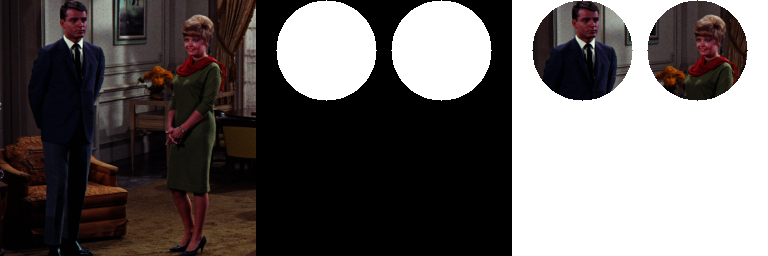

In [86]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask dengan bentuk lingkaran
mask = np.zeros(original.shape, original.dtype)  # mask hanya di satu channel (grayscale)
cv.circle(mask, (70,50), 50, (255,255,255), -1)
cv.circle(mask, (185,50), 50, (255,255,255), -1)

# Menerapkan mask pada gambar
masked_image = cv.bitwise_and(original, mask)
masked_image[np.all(masked_image == [0, 0, 0], axis=-1)] = [255, 255, 255]

# Menampilkan gambar asli, mask, dan gambar yang di-mask
final_frame = cv.hconcat([original, mask, masked_image])

# Menampilkan hasilnya
cv2_imshow(final_frame)

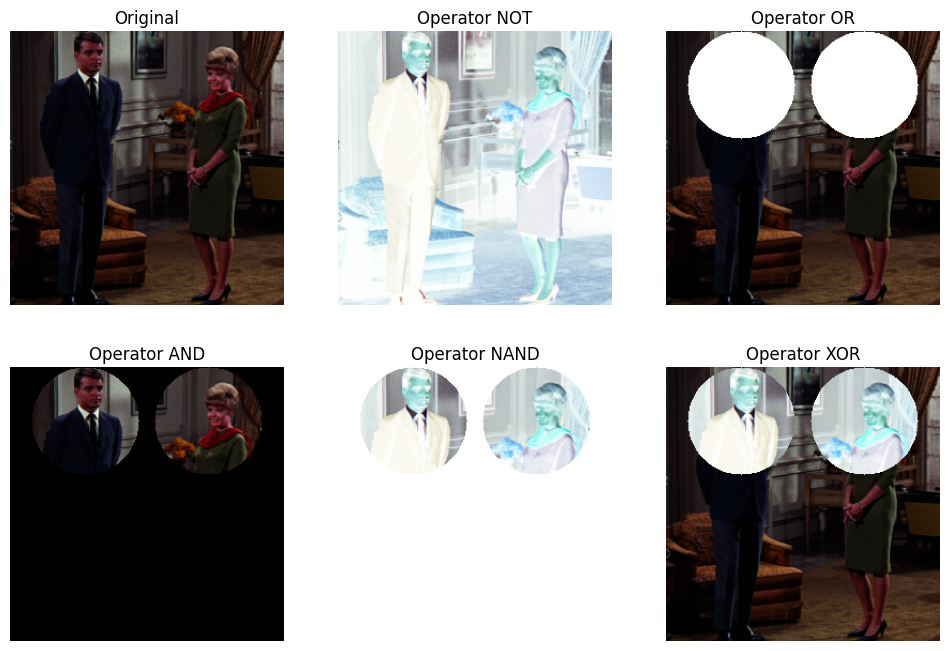

In [87]:
masked_image_not = cv.bitwise_not(original)
masked_image_or = cv.bitwise_or(original, mask)
masked_image_and = cv.bitwise_and(original, mask)
masked_image_nand = cv.bitwise_not(masked_image_and)
masked_image_xor = cv.bitwise_xor(original, mask)

# Fungsi untuk menampilkan gambar dalam plt
def show_images_with_titles(images, titles):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')  # Menghilangkan axis

    plt.show()

# Daftar gambar yang ingin ditampilkan
images = [original, masked_image_not, masked_image_or, masked_image_and, masked_image_nand, masked_image_xor]
titles = ['Original', 'Operator NOT', 'Operator OR', 'Operator AND', 'Operator NAND', 'Operator XOR']

# Menampilkan gambar dan judul
show_images_with_titles(images, titles)